In [ ]:
!pip install keras opencv-python numpy
!pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 100kB/s 
     |████████████████████████████████| 3.2MB 24.1MB/s 
     |████████████████████████████████| 491kB 23.2MB/s 
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


In [ ]:
cd '/content/drive/My Drive'

/content/drive/My Drive


In [ ]:
import zipfile

zip = zipfile.ZipFile('pickle.zip')
zip.extractall('pickle')
zip.close()

In [ ]:
import cv2
import numpy as np
import pickle

train_data = pickle.load(open("./pickle/pickle/train_data.pkl","rb"))
train_label = pickle.load(open("./pickle/pickle/train_label.pkl","rb"))
test_data = pickle.load(open("./pickle/pickle/test_data.pkl","rb"))
test_label = pickle.load(open("./pickle/pickle/test_label.pkl","rb"))

print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

height, width = train_data.shape[1], train_data.shape[2]
#Chuan hoa du lieu
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], train_data.shape[2], 1)
test_data = test_data.reshape(test_data.shape[0], test_data.shape[1], test_data.shape[2], 1)
input_shape = (height, width, 1)
num_classes = train_label.shape[1]
num_pixels = height*width
print(num_classes)
print(num_pixels)

(11645, 64, 64)
(11645, 32)
(2710, 64, 64)
(2710, 32)
32
4096


In [ ]:
#create Model
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.models import Sequential
from keras.optimizers import SGD 

model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = input_shape ))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])
print(model.summary())

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               7372928   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [ ]:
#train_model
batch_size = 100
epochs = 350
history = model.fit(train_data, train_label, 
                    batch_size = batch_size, verbose = 1, epochs = epochs, validation_data = (test_data, test_label))
score = model.evaluate(test_data, test_label, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 11645 samples, validate on 2710 samples
Epoch 1/350
11645/11645 [==============================] - 13s 1ms/step - loss: 2.2014 - accuracy: 0.4184 - val_loss: 1.2770 - val_accuracy: 0.7299
Epoch 2/350
11645/11645 [==============================] - 7s 581us/step - loss: 1.0926 - accuracy: 0.7349 - val_loss: 0.7243 - val_accuracy: 0.8162
Epoch 3/350
11645/11645 [==============================] - 7s 584us/step - loss: 0.7944 - accuracy: 0.8042 - val_loss: 0.5132 - val_accuracy: 0.8830
Epoch 4/350
11645/11645 [==============================] - 7s 584us/step - loss: 0.6596 - accuracy: 0.8380 - val_loss: 0.4550 - val_accuracy: 0.8856
Epoch 5/350
11645/11645 [==============================] - 7s 579us/step - loss: 0.5908 - accuracy: 0.8483 - val_loss: 0.3857 - val_accuracy: 0.9037
Epoch 6/350
11645/11645 [==============================] - 7s 583us/step - loss: 0.5371 - accuracy: 0.8630 - val_loss: 0.3634 - val_accuracy: 0.9044
Epoch 7/350
11645/11645 [==============================] -

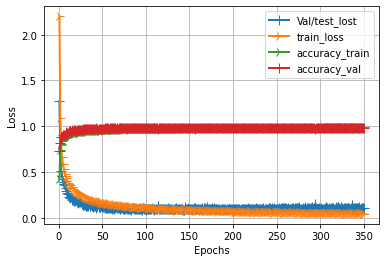

In [ ]:
#Ve bieu do
import matplotlib.pyplot as plt
history_dict = history.history

loss_values = history_dict['loss']
validate_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) +1)
line1 = plt.plot(epochs, validate_values, label = 'Val/test_lost')
line2 = plt.plot(epochs, loss_values, label = 'train_loss')
line3 = plt.plot(epochs, acc_values, label = 'accuracy_train')
line4 = plt.plot(epochs, val_acc_values, label = 'accuracy_val')

plt.setp(line1, linewidth = 2.0, marker = "+", markersize = 10)
plt.setp(line2, linewidth = 2.0, marker = "4", markersize = 10)
plt.setp(line3, linewidth = 2.0, marker = "4", markersize = 10)
plt.setp(line4, linewidth = 2.0, marker = "+", markersize = 10)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#luu model
model.save('/content/drive/My Drive/ssd-mbv1/models/model_kt1.h5')
print('Model saved')

Model saved


In [ ]:
from keras.models import load_model

model_test = load_model('/content/drive/My Drive/ssd-mbv1/models/model_kt1.h5')
print('Model Loaded')

Model Loaded


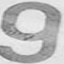

9


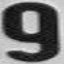

9


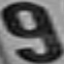

9


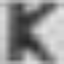

K


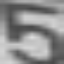

5


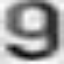

9


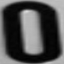

0


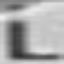

L


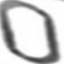

0


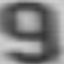

9


In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
labels = ['F', 'Z', '5', '7', '0', 'H', '3', 'N', 'E', '2', 'U', 'S', 'K', 'L', 'D', 'T', 'B', '9', 'X', 'Y', '8', 'C', '1', 'R', 'V', 'A', '4', 'Q', '6', 'P', 'G', 'M']

for i in range(10):
    index = np.random.randint(1900)
    img = test_data[index]
    y_predict = model_test.predict(img.reshape(1, 64, 64, 1))
    img = img*255
    img = img.reshape(64, 64)
    cv2_imshow(img)
    print(labels[np.argmax(y_predict)])